In [1]:
import sklearn
# from input_file import extract_all_data
import os
from skimage import io, color, img_as_ubyte
from skimage.feature import hog
import numpy as np
# 保存模型
from sklearn.externals import joblib

d:\programs\python\python36\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


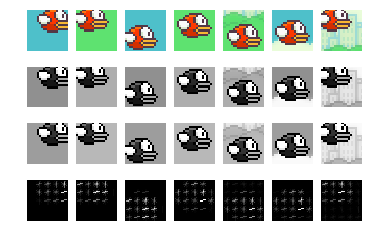

In [2]:
# visualization
import matplotlib.pyplot as plt
label = ['src', 'gamma', 'hog']
for i in range(0, 7):
    fileName = 'data/positive/' + str(i + 1) + '.bmp'
    img = io.imread(fileName)
    plt.subplot(4, 7, i+1)
    plt.imshow(img.astype('uint8'))
    plt.axis('off')
    
    gray = color.rgb2gray(img)
    plt.subplot(4, 7, 7+i+1)
    plt.imshow(gray, cmap='gray')
    plt.axis('off')
    
    # gamma correction
    gamma = np.power(gray/float(np.max(gray)), 1/1.5)
    plt.subplot(4, 7, 14+i+1)
    plt.imshow(gamma, cmap='gray')
    plt.axis('off')
    # hog
    normalised_blocks, hog_image = hog(gamma, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualise=True)
    plt.subplot(4, 7, 21+i+1)
    plt.imshow(hog_image, cmap='gray')
    plt.axis('off')
    
plt.show()

In [14]:
# 1 par
PosNum = 300
NegNum = 500
winSize = (40, 40)
blockSize = (16, 16)  # 105
blockStride = (8, 8)  # 4 cell
cellSize = (8, 8)
nBin = 9  # 9 bin 

# read in pics
train_imgs = np.zeros((PosNum + NegNum, 40, 40, 3))
featureNum = int(((40 - 16) / 8 + 1) * ((40 - 16) / 8 + 1) * 4 * 9)  # 576
featureArray = np.zeros(((PosNum + NegNum), featureNum), np.float32)
labelArray = np.zeros((PosNum + NegNum), np.int32)
for i in range(0, PosNum):
    fileName = 'data/positive/' + str(i) + '.bmp'
    img = io.imread(fileName, as_grey=True)
    gamma = np.power(img/float(np.max(img)), 1/1.5)
    normalised_blocks = hog(gamma, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
    featureArray[i: ] = normalised_blocks
    labelArray[i] = 1

for i in range(0, NegNum):
    fileName = 'data/negative/' + str(i) + '.bmp'
    img = io.imread(fileName, as_grey=True)
    gamma = np.power(img/float(np.max(img)), 1/1.5)
    normalised_blocks = hog(gamma, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
#     train_imgs[i, :, :, :] = img
    featureArray[i + PosNum: ] = normalised_blocks
    labelArray[i + PosNum] = 0

# train_imgs = train_imgs.reshape((PosNum+NegNum, -1))
# test_mean = np.mean(train_imgs, axis=0)
# train_imgs -= test_mean

# y = wx + b 在训练集最后加上一维'1'，求解的W最后一维就相当于b的值，b无需单独求解
# train_imgs = np.hstack([train_imgs, np.ones((train_imgs.shape[0], 1))])

d:\programs\python\python36\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


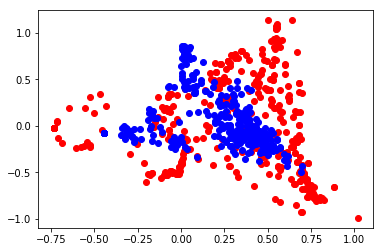

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA 降维
pca = PCA(n_components=2, copy=True)
data_size = 500
pos_features = pca.fit_transform(featureArray[:data_size])
neg_features = pca.fit_transform(featureArray[PosNum:PosNum+data_size])
# 显示
plt.plot(pos_features[:,0], pos_features[:,1], 'ro')
plt.plot(neg_features[:,0], neg_features[:,1], 'bo')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import time

Kernel = ["linear"] # ,"rbf","sigmoid"
Xtrain, Xtest, Ytrain, Ytest = train_test_split(featureArray, labelArray, test_size=0.3, random_state=420)

time0 = time.time()
clf = SVC(kernel = 'linear', gamma="auto", cache_size=5000).fit(Xtrain, Ytrain)
print("The accuracy %f" % (clf.score(Xtest,Ytest)))
print(time.time()-time0)
joblib.dump(clf, "train_model.m")

The accuracy 0.987500
0.27826642990112305


['train_model.m']

In [12]:
# 载入模型
# clf = joblib.load("train_model.m")


['train_model.m']